In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [578]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [579]:
data.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### Exploratory Data Analysis (EDA) 

In [256]:
# Checking dataset size
data.shape

(32560, 15)

In [257]:
# looking for basic information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


###### There are no null values in our dataset.
###### In our dataset there are 6 columns which contain integer values and 9 columns contain Object values.
###### Our target variable is also object dtype we need to convert it into int64.

In [258]:
### checking Null values again to confirm.
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

###### Confirmed our dataset does not contain any null values.

In [259]:
data['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

In [260]:
29849 - 32560 ### Checking entries wihich are non zero.

-2711

###### There are 29849 entries for 0 in column Capital Gain. Only 2711 entries contain values non zero.

In [261]:
data['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [262]:
32560 - 31041 ### Checking non zero values in Capital loss column.

1519

###### In this column only 1519 entries are non zero rest 31041 are zero.

In [263]:
data['Workclass'].value_counts().unique

<bound method Series.unique of  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64>

###### The Workclass column is catagorical column, which contain ? for 1836 entries which we have to change it to others.

In [264]:
data['Occupation'].value_counts().unique

<bound method Series.unique of  Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64>

###### In this Occupation column also we have ? for 1843 entries.

In [265]:
data['Marital_status'].value_counts().unique

<bound method Series.unique of  Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64>

In [266]:
data['Income'].value_counts().unique

<bound method Series.unique of  <=50K    24719
 >50K      7841
Name: Income, dtype: int64>

###### In our target veriable we have to class less then or equal to 50k and greater then 50k.

In [267]:
data['Education'].value_counts().unique

<bound method Series.unique of  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64>

##### Education dataset looks fine.

In [268]:
### Checking data description statistically.
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can see age column is fine.
The data in Final weight column is also looks fine. And education_num is also looks ok.
In Columns capital gain and capital loss the mean & std difference is more, mean value is less then STD which is not good.
Also mean value and all the quartiles contain zero values  only max value shows 99999 and 4365.
Hours per week column show correct difference between mean and Std, Also the value distribution in min, quartile and max are 
equally.

##### (i) Univeriate Analysis.

<AxesSubplot:xlabel='Income', ylabel='count'>

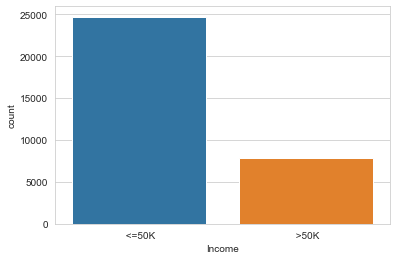

In [269]:
sns.countplot(x='Income',data=data)

###### We can see there is class Imbalance problem in our target variable.

<AxesSubplot:ylabel='Sex'>

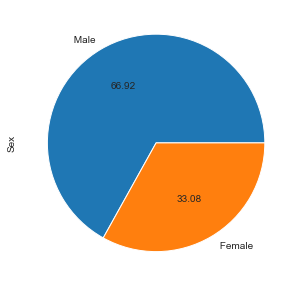

In [270]:
x = data['Sex'].value_counts([0])
x.plot(kind = 'pie', figsize = (5,5), fontsize=10, autopct = '%.2f')

###### In our dataset sex ratio is 66.92% are male and 33.08% are female.

<AxesSubplot:xlabel='Education', ylabel='count'>

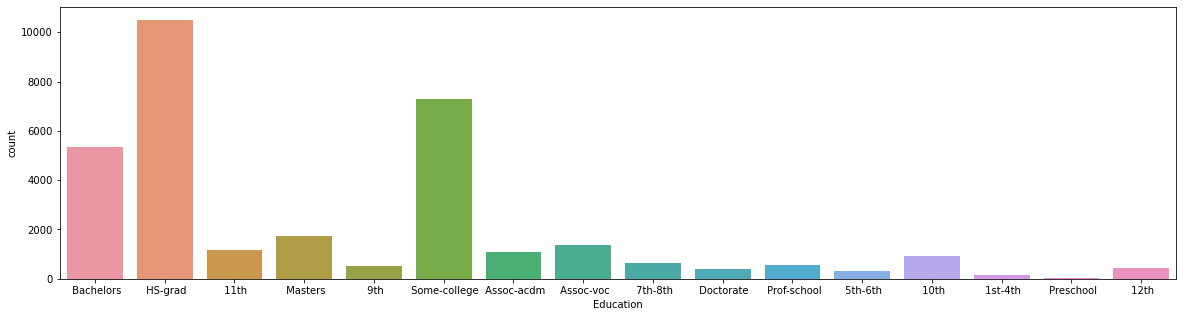

In [73]:
plt.figure(figsize=(20,5))
sns.countplot(x= data['Education'])

###### In Education column to classes has more count HS-grad and Some-college.

<AxesSubplot:xlabel='Marital_status', ylabel='Age'>

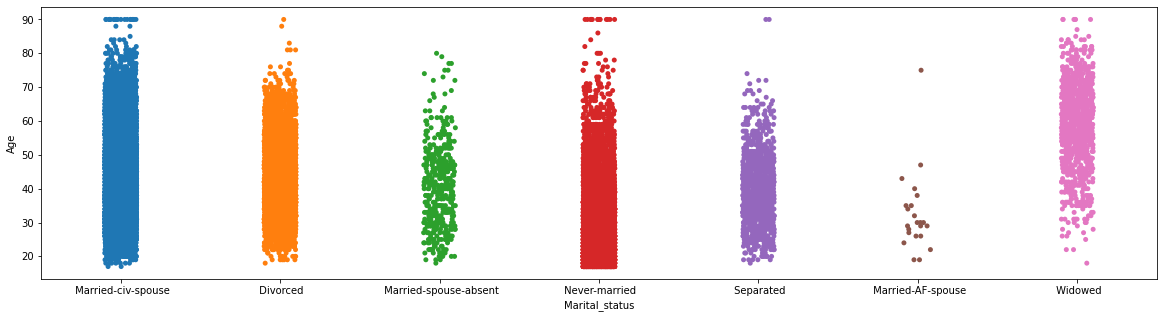

In [78]:
plt.figure(figsize=(20,5))
sns.stripplot(x=data['Marital_status'], y= data['Age'])

###### We can see our maximum data points are covered by Never-Married, Married-civ-spouse and windows.
###### Married=AF=spouse has very less count

##### Biveriate Analysis

<Figure size 720x720 with 0 Axes>

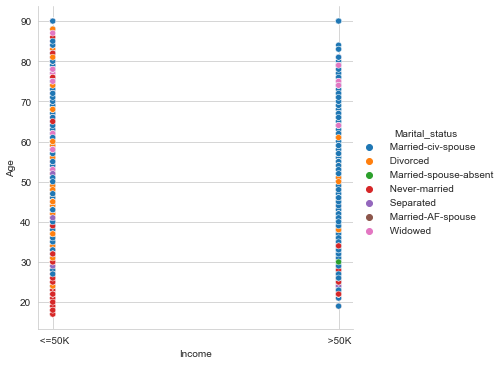

In [271]:
plt.figure(figsize=(10,10))
sns.relplot(x= 'Income',y= 'Age',data=data, hue='Marital_status')

###### WE can see Married-cv-spouse has >50k income as compare to Never Married, Widows and Divorced

<Figure size 1440x1440 with 0 Axes>

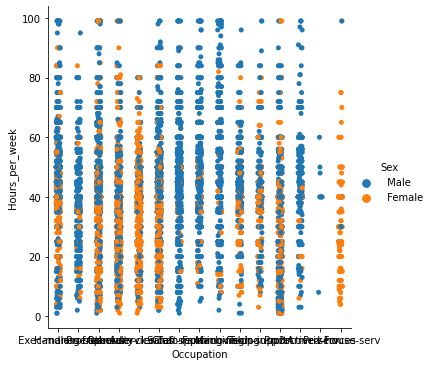

In [100]:
plt.figure(figsize=(20,20))
sns.catplot(x='Occupation', y= 'Hours_per_week', hue='Sex', data=data)
plt.show()

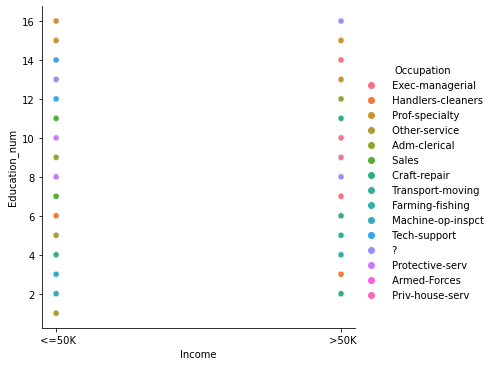

In [104]:
sns.relplot(x= 'Income',y= 'Education_num', hue='Occupation', data=data)

###### Exec managerial has more salary, and also this does not depend completely on Education number.

<Figure size 1440x360 with 0 Axes>

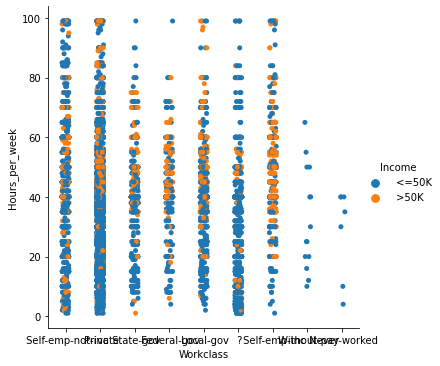

In [113]:
plt.figure(figsize=(20,5))
sns.catplot(x= 'Workclass', y= 'Hours_per_week',hue='Income', data=data)

###### We can see self-employement has income >50k as compare to private and state govt employees.


<AxesSubplot:xlabel='Income', ylabel='Native_country'>

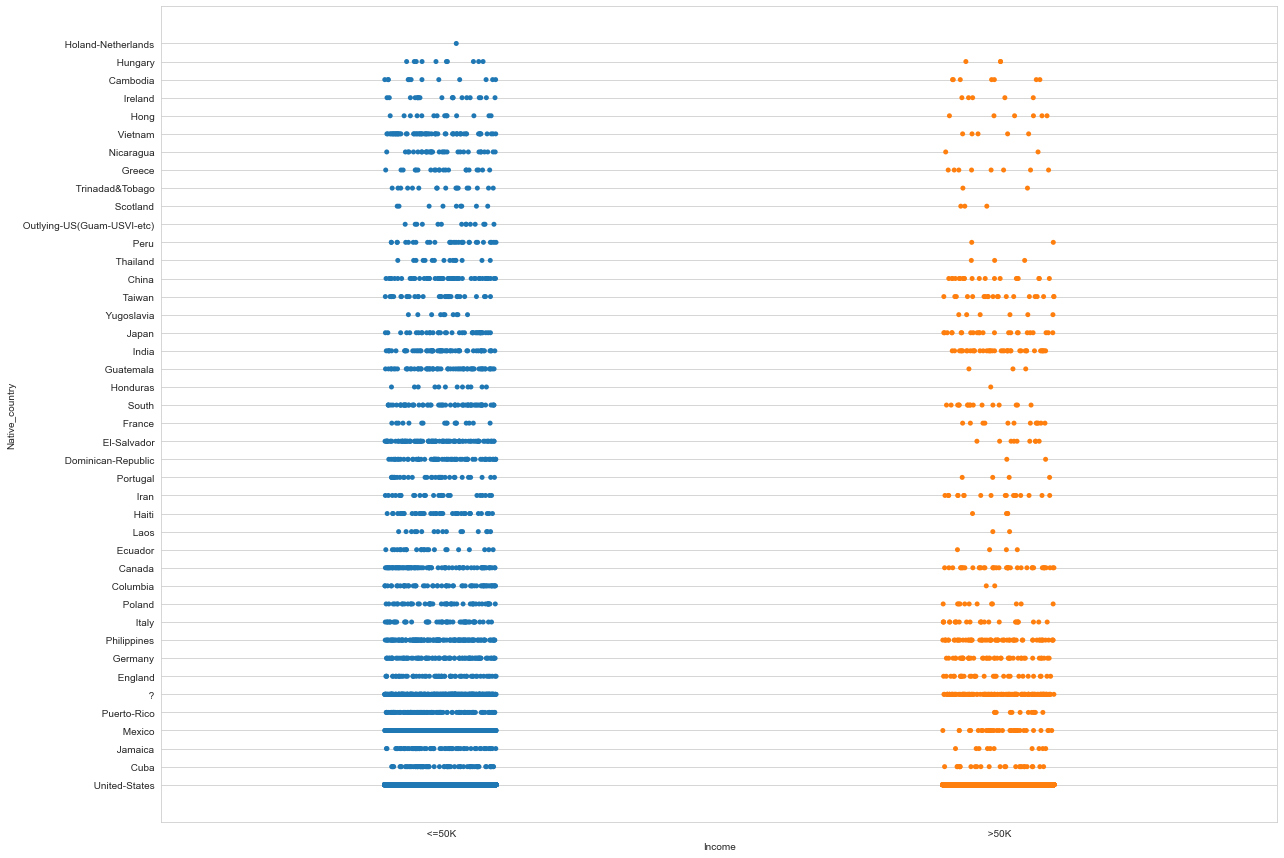

In [273]:
plt.figure(figsize=(20,15))
sns.stripplot(x='Income', y='Native_country',data=data)

###### From above plot we can see that peoples in country like US, India, and Philippines as >50k income as compare to other countries.
###### '?' This entry contain data for non identify countries will convert it to others.
###### Except 3 - 4 countires all the countires people has average below 50k.

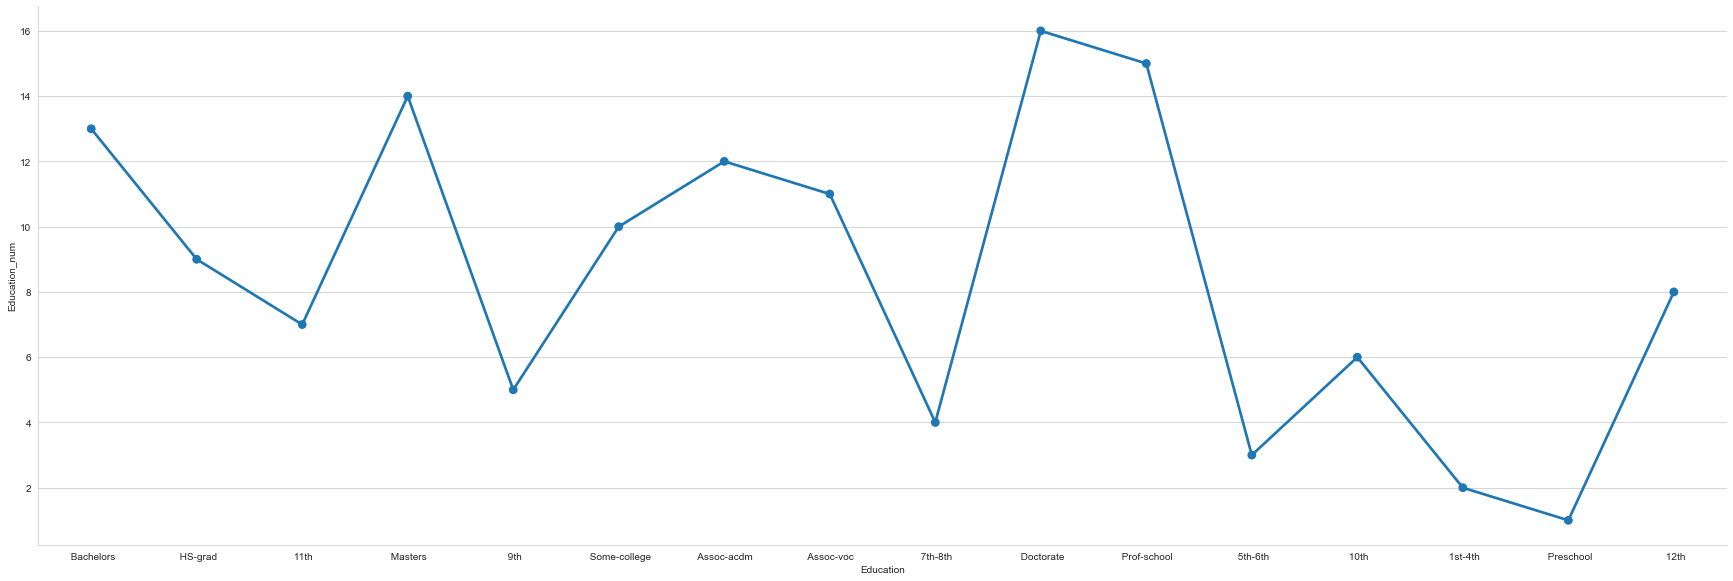

In [140]:
sns.catplot(ax=ax,x='Education', y= 'Education_num',data=data,kind='point', height=8, aspect=3)

###### Doctorate and prof-school has more  education numbers then others.

##### Multiveriate Analysis

In [274]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [275]:
### Storing catagorical columns in cols variable.
cols = ['Workclass', 'Education', 'Marital_status', 'Occupation','Relationship', 'Race', 'Sex', 'Native_country', 'Income']

In [580]:
### Before that we need to convert our catagorical data into numaric.
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
data[cols] = data[cols].apply(l_encoder.fit_transform) ### Applying label encoder on all the catagorical columns

In [581]:
data.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
7,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
8,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1
9,37,4,280464,15,10,2,4,0,2,1,0,0,80,39,1


###### Here target variable now has 0 for <=50k and 1 is for >50k

<AxesSubplot:>

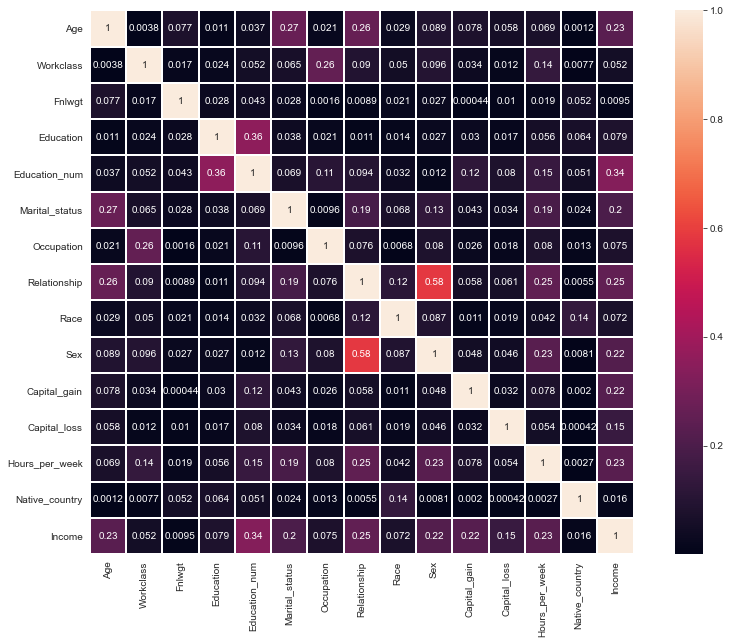

In [278]:
#### Let's check correlationship between target variable and features variable.
data_corr = data.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(data=data_corr,linewidths=1,annot=True, square=True,)

In [279]:
#### Let's check relationship between All the features vs target variable.
data.drop('Income',axis=1).corrwith(data.Income).sort_values(ascending=False)

Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
dtype: float64

###### As we can see Fnlwgt amd Native_Country are showing less relationship which is as equal to zero. Hence we can drop it.

In [586]:
data.drop(['Fnlwgt','Native_country'],axis=1, inplace=True)

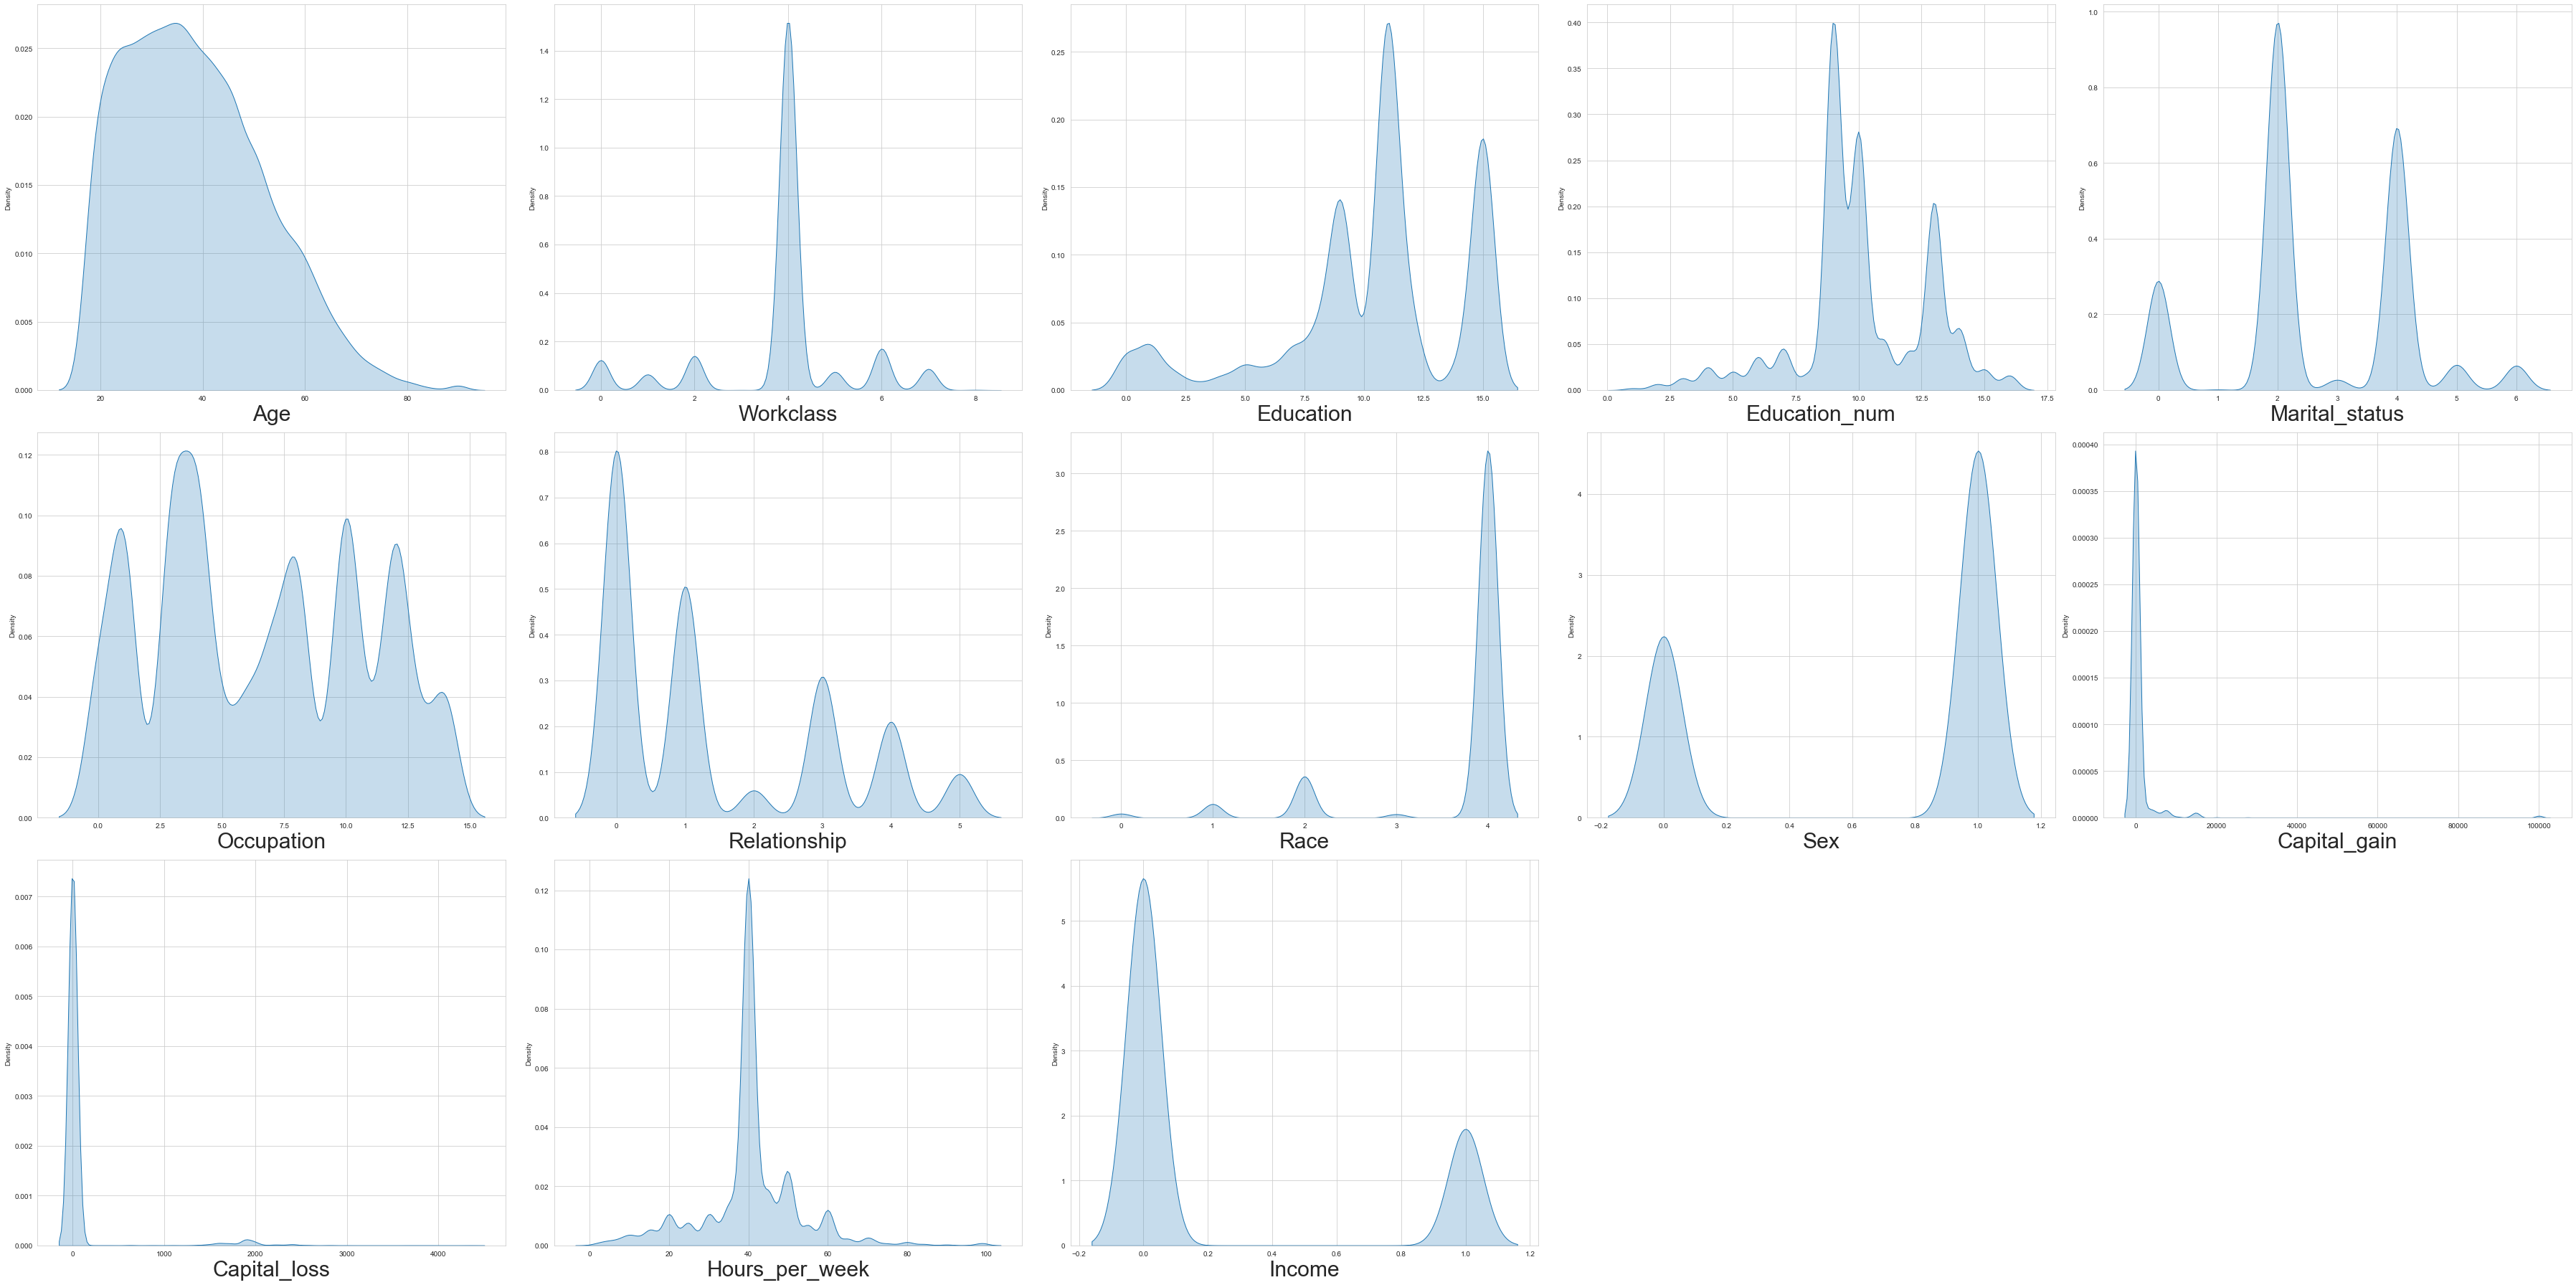

In [587]:
# Checking data distirution for all the features
plt.figure(figsize=(50,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sns.kdeplot(data[column],shade=True)
        plt.xlabel(column,fontsize=30)
        
    plotnumber+=1
plt.tight_layout()

###### Checking data distribution for continous data only. Column Age shows slightly right skewness.
###### Fnlwght column also shows right skewness.
###### Education column data look like normally distributed.
###### Capital gain and Capital Loss shows right skewed data because it contain Max data points as zero value.

In [588]:
data.skew()

Age                0.558738
Workclass         -0.752280
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

###### Data in Capital Gain and Capital Loss is highly right skewed.

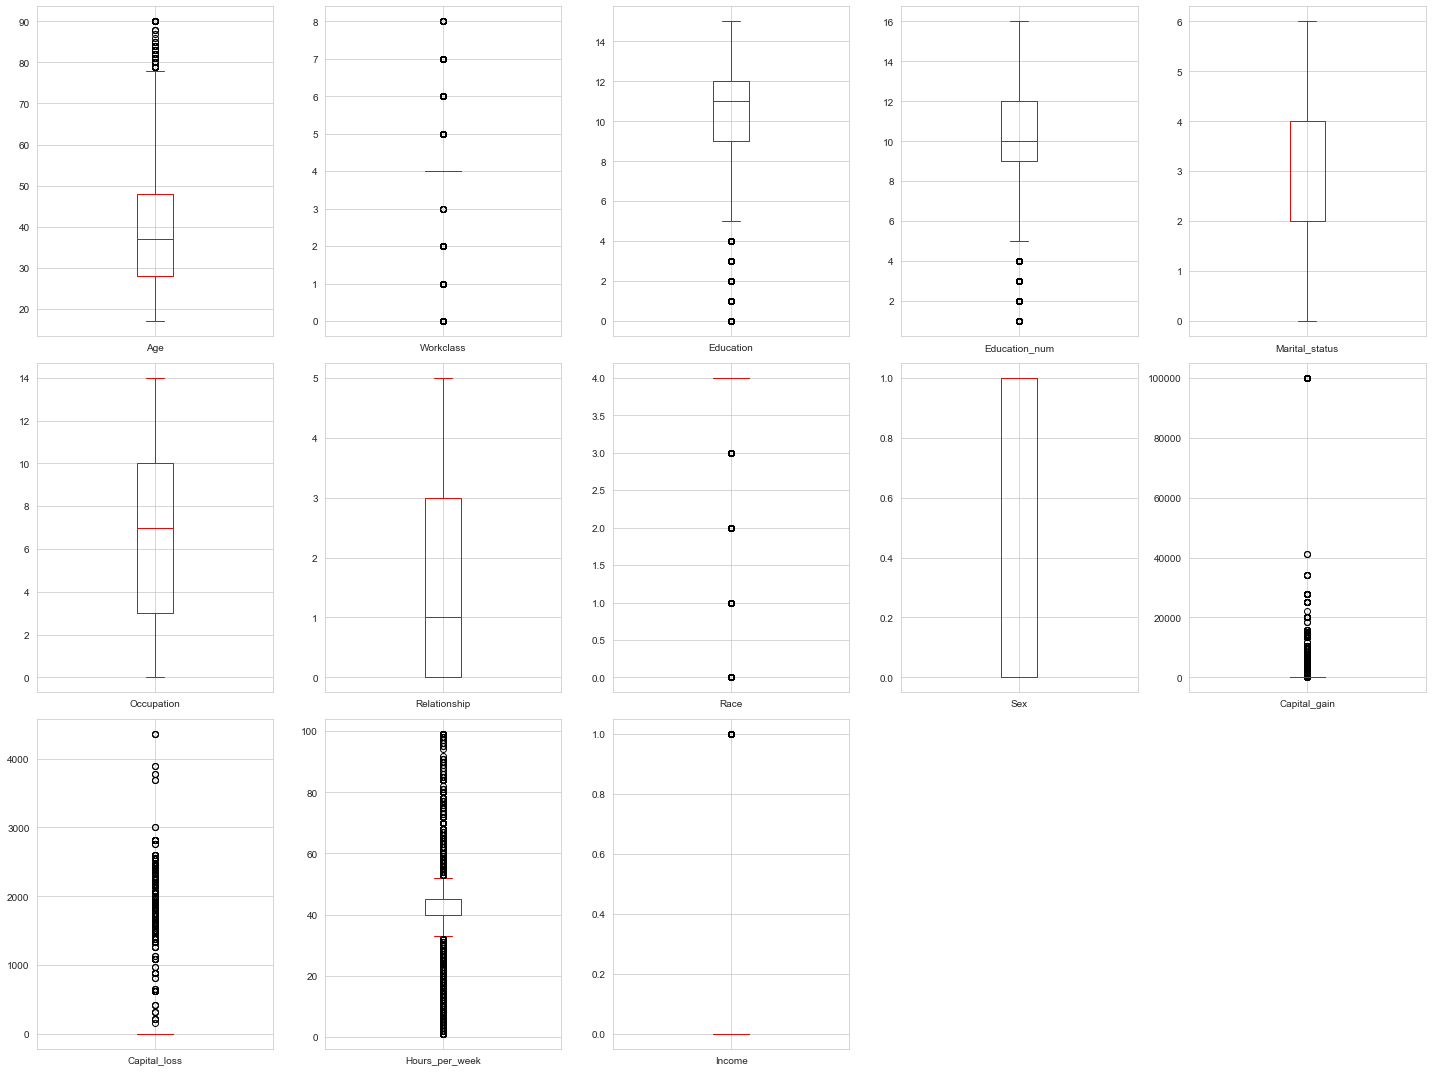

In [589]:
### Ploting box plot to check for outliers.
plt.figure(figsize=(20,15), facecolor='white')
count = 1
for column in data:
    if count<=15:
        ax = plt.subplot(3,5,count)
        data[column].plot(kind = 'box',color ='r')
    count +=1
plt.tight_layout()

###### Checking outlier only for Continuous data columns.
 Column Age, FinalWeight, Capital gain, Capital loss,  Hous per week, and Education number contain many outlier in it.

In [590]:
### Let's try to remove outlier.
from scipy.stats import zscore
z = np.abs(zscore(data[['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week']]))
filter_entry = (z<3).all(axis = 1)
df = data[filter_entry]

In [591]:
df.skew()

Age                0.494157
Workclass         -0.743818
Education         -0.942431
Education_num     -0.171984
Marital_status    -0.050738
Occupation         0.122006
Relationship       0.742629
Race              -2.414830
Sex               -0.681022
Capital_gain       4.940872
Capital_loss      29.821934
Hours_per_week    -0.354877
Income             1.330384
dtype: float64

In [592]:
print(df.shape,data.shape)

(30150, 13) (32560, 13)


In [593]:
### Checking data loss after applying Z_Score.
data_loss = ((32560 - 29827)/32560)*100
data_loss

8.393734643734643

After applying Zscore 8.3% data is loss. Which is acceptable.
###### As we can see skewness is removed from all the Continous columns except Capital gain and Capital Loss columns.

In [594]:
### Let's spliting our target variable and features in X and Y.
X = df.drop(['Income'],axis=1)
y = df['Income']

In [598]:
# Now let's deal with Class imbalance problem.
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_new,y_new = sm.fit_resample(X,y)

In [599]:
y_new.value_counts()

0    23424
1    23424
Name: Income, dtype: int64

###### Now both the classes are equal now.

### Scaling (Standardization)

In [601]:
#### Now lets scale our data.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x_new)
print('Our X data is now scaled now stored in x_scaled')

Our X data is now scaled now stored in x_scaled


### Train - Test Split

In [623]:
 # Now converting data into Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_new,test_size=0.25,random_state=41)

In [624]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(35136, 12) (35136,) (11712, 12) (11712,)


### Finding best model


In [625]:
## Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [626]:
#### Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_lr_pred = lr.predict(x_test)

In [627]:
confusion_matrix(y_test,y_lr_pred)

array([[4333, 1469],
       [1244, 4666]], dtype=int64)

In [635]:
accuracy_lr = classification_report(y_test,y_lr_pred)
print(accuracy_lr)
cv_lr = cross_val_score(lr,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_lr)

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      5802
           1       0.76      0.79      0.77      5910

    accuracy                           0.77     11712
   macro avg       0.77      0.77      0.77     11712
weighted avg       0.77      0.77      0.77     11712

Cross validation score : 0.7694459588964401


In [636]:
#### Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_dt_pred = dt.predict(x_test)

In [637]:
confusion_matrix(y_test,y_dt_pred)

array([[4879,  923],
       [ 750, 5160]], dtype=int64)

In [638]:
accuracy_dt = classification_report(y_test,y_dt_pred)
print(accuracy_dt)
cv_dt = cross_val_score(dt,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_dt)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      5802
           1       0.85      0.87      0.86      5910

    accuracy                           0.86     11712
   macro avg       0.86      0.86      0.86     11712
weighted avg       0.86      0.86      0.86     11712

Cross validation score : 0.8616810588018595


In [646]:
### SVC
svc = SVC()
svc.fit(x_train,y_train)
y_svc_pred = svc.predict(x_test)

In [647]:
confusion_matrix(y_test,y_svc_pred)

array([[4505, 1297],
       [ 621, 5289]], dtype=int64)

In [648]:
accuracy_svc = classification_report(y_test,y_svc_pred)
print(accuracy_svc)
cv_svc = cross_val_score(svc,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_svc)

              precision    recall  f1-score   support

           0       0.88      0.78      0.82      5802
           1       0.80      0.89      0.85      5910

    accuracy                           0.84     11712
   macro avg       0.84      0.84      0.84     11712
weighted avg       0.84      0.84      0.84     11712

Cross validation score : 0.8374749124391585


In [640]:
### Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)

In [641]:
confusion_matrix(y_test,y_rf_pred)

array([[5009,  793],
       [ 571, 5339]], dtype=int64)

In [642]:
accuracy_rf = classification_report(y_test,y_rf_pred)
print(accuracy_rf)
cv_rf = cross_val_score(rf,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_rf)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      5802
           1       0.87      0.90      0.89      5910

    accuracy                           0.88     11712
   macro avg       0.88      0.88      0.88     11712
weighted avg       0.88      0.88      0.88     11712

Cross validation score : 0.8882778499406466


In [643]:
### K-Neighbors Classifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
y_knn_pred = kn.predict(x_test)

In [644]:
confusion_matrix(y_test,y_knn_pred)

array([[4745, 1057],
       [ 602, 5308]], dtype=int64)

In [645]:
accuracy_kn = classification_report(y_test,y_knn_pred)
print(accuracy_kn)
cv_kn = cross_val_score(kn,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_kn)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      5802
           1       0.83      0.90      0.86      5910

    accuracy                           0.86     11712
   macro avg       0.86      0.86      0.86     11712
weighted avg       0.86      0.86      0.86     11712

Cross validation score : 0.852459635212427


#### Out of 5 model Random Forest Classifier is our best model, Becuase its given as acc 88% and Cross validatiion score 88.8%. therefore its our best model.

### Let's find ROC_AUC_Scrore`

In [650]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
#### Logistic Regression
print('roc_auc_score for Logistic Regression:',roc_auc_score(y_test,y_lr_pred))
#### Decision Tree Classifier
print('roc_auc_score for Decision Tree Classifier:',roc_auc_score(y_test,y_dt_pred))
#### SVC  
print('roc_auc_score for SVC:',roc_auc_score(y_test,y_svc_pred))
#### Random Forest Classifier 
print('roc_auc_score for Random Forest Classifier:',roc_auc_score(y_test,y_rf_pred)) 
### K-Neighbors Classifier
print('roc_auc_score for K-Neighbors Classifier:',roc_auc_score(y_test,y_knn_pred))


roc_auc_score for Logistic Regression: 0.7681603752950584
roc_auc_score for Decision Tree Classifier: 0.8570066859493575
roc_auc_score for SVC: 0.8356901261073986
roc_auc_score for Random Forest Classifier: 0.8833535434131762
roc_auc_score for Knn: 0.8579800943836975


### Let's PLOT roc_auc curve for our model

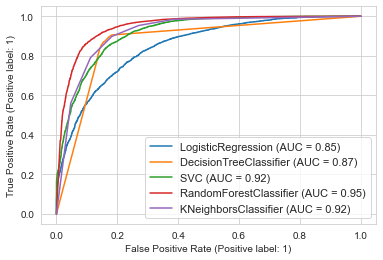

In [651]:
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_) # Here ax_ means axes with confusion matrix
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11},loc = 'lower right')
plt.show()

##### With roc_auc_curve we can see that Random forest Classifier is covering 95% of test dataset. So for this dataset Random forest Classifier is best model.

### Hyper parameter tuning using GridSearchCV

In [652]:
from sklearn.model_selection import GridSearchCV

In [663]:
params = {'n_estimators':np.arange(50,100,10),
          'criterion':['gini','entropy'],
          'max_depth':np.arange(5,15,2),
          'min_samples_split':np.arange(2,15,2),
          'max_features':['auto','sqrt','log2']}

In [664]:
gridsearch = GridSearchCV(estimator=rf,param_grid=params,cv=5,n_jobs=-1)

In [665]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  7,  9, 11, 13]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([50, 60, 70, 80, 90])})

In [666]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 70}

In [667]:
rfc_final = RandomForestClassifier(n_estimators = 70,min_samples_split=2,max_features='log2',max_depth=13,criterion='gini')

In [668]:
rfc_final.fit(x_train,y_train)

RandomForestClassifier(max_depth=13, max_features='log2', n_estimators=70)

In [669]:
y_pred = rfc_final.predict(x_test)

In [670]:
confusion_matrix(y_test,y_pred)

array([[4697, 1105],
       [ 495, 5415]], dtype=int64)

In [671]:
accuracy = classification_report(y_test,y_pred)
print(accuracy)
cv_rfc = cross_val_score(rfc_final,x_scaled,y_new,cv=5).mean()
print('Cross validation score :',cv_rfc)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5802
           1       0.83      0.92      0.87      5910

    accuracy                           0.86     11712
   macro avg       0.87      0.86      0.86     11712
weighted avg       0.87      0.86      0.86     11712

Cross validation score : 0.8652884663687429


###### As we can see our previous model with default parameters is giving better performance then the model instantiate with best parameters. Hence we are saving default model as final model.


### Saving our model using Pickle

In [678]:
import pickle
Census_Income = 'Census_Income.pickle'
pickle.dump(rf,open(Census_Income,'wb'))

In [679]:
loaded_model = pickle.load(open(Census_Income,'rb'))

In [680]:
test = loaded_model.predict(x_test)

In [681]:
confusion_matrix(y_test,test)

array([[5009,  793],
       [ 571, 5339]], dtype=int64)

In [682]:
 accuracy = classification_report(y_test,test)
print(accuracy)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      5802
           1       0.87      0.90      0.89      5910

    accuracy                           0.88     11712
   macro avg       0.88      0.88      0.88     11712
weighted avg       0.88      0.88      0.88     11712



In [ ]:
#### ______________________________________________________Model tested._______________________________________________________________________________________________